## Exploratory Analysis of Deep Blue's Xtract Crawl

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load crawl CSV
deep_blue_crawl_df = pd.read_csv("data/deep_blue_xtract_crawl.csv")

In [4]:
# Get compressed extensions
compressed_extensions = set(deep_blue_crawl_df[deep_blue_crawl_df.label == "compressed"].extension)

In [5]:
# Get data on file size of each extension
for extension in compressed_extensions:
    print(f"{extension}: ")
    print(deep_blue_crawl_df[deep_blue_crawl_df.extension == extension].describe())

tar: 
         size_bytes
count  1.600000e+01
mean   4.482301e+09
std    8.152891e+09
min    2.910800e+04
25%    4.274491e+08
50%    1.001690e+09
75%    1.453554e+09
max    2.102018e+10
gz: 
         size_bytes
count  3.300000e+01
mean   2.128045e+10
std    3.965044e+10
min    1.806800e+04
25%    3.972696e+07
50%    9.708754e+08
75%    1.050042e+10
max    1.167499e+11
zip: 
         size_bytes
count  8.240000e+02
mean   3.516081e+09
std    2.539581e+10
min    4.451000e+03
25%    5.159525e+06
50%    2.541659e+07
75%    1.542360e+08
max    4.280410e+11


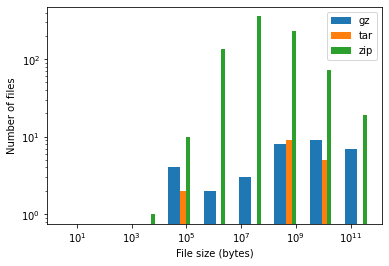

In [6]:
# Split the file size data by extension
gz_data = deep_blue_crawl_df[deep_blue_crawl_df.extension == "gz"].size_bytes.values
tar_data = deep_blue_crawl_df[deep_blue_crawl_df.extension == "tar"].size_bytes.values
zip_data = deep_blue_crawl_df[deep_blue_crawl_df.extension == "zip"].size_bytes.values

# Create bins in logspace
bins = np.logspace(0,np.log10(max(deep_blue_crawl_df[deep_blue_crawl_df.label == "compressed"].size_bytes.values)), 10)

# Plot the data
plt.hist([gz_data, tar_data, zip_data], label=["gz", "tar", "zip"], bins=bins)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("File size (bytes)")
plt.ylabel("Number of files")
plt.legend(loc="upper right")

In [11]:
import os
files = []
for file in deep_blue_crawl_df[deep_blue_crawl_df.label == "compressed"].full_path.values:
    files.append(os.path.basename(file))

In [15]:
for file in files:
    if files.count(file) > 1:
        print(file)

skull.zip
whole-body.zip
Code.zip
skull.zip
whole-body.zip
Code.zip
full_body.zip
skull.zip
whole-body.zip
full_body.zip
skull.zip


In [16]:
deep_blue_crawl_df[deep_blue_crawl_df.extension == "gz"].sort_values("size_bytes")


,full_path,size_bytes,extension,label,file_uuid
1714,/UMich/download/DeepBlueData_79407x76d/fig07.t...,18068,gz,compressed,63d78453_fig07.tar.gz
1709,/UMich/download/DeepBlueData_79407x76d/fig01.t...,38664,gz,compressed,91d34c36_fig01.tar.gz
1713,/UMich/download/DeepBlueData_79407x76d/fig06.t...,115471,gz,compressed,48cdf98f_fig06.tar.gz
1712,/UMich/download/DeepBlueData_79407x76d/fig05.t...,146706,gz,compressed,81bd6579_fig05.tar.gz
1711,/UMich/download/DeepBlueData_79407x76d/fig04.t...,241217,gz,compressed,39642293_fig04.tar.gz
4305,/UMich/download/DeepBlueData_pv63g053w/repro_1...,1860394,gz,compressed,2b3690eb_repro_10k_annotations.tar.gz
4311,/UMich/download/DeepBlueData_pv63g053w/repro_5...,9905513,gz,compressed,1bc3c287_repro_50k_annotations.tar.gz
4307,/UMich/download/DeepBlueData_pv63g053w/repro_1...,34632285,gz,compressed,fd9cb954_repro_10k_segmentations.tar.gz
4308,/UMich/download/DeepBlueData_pv63g053w/repro_2...,39726958,gz,compressed,14d76015_repro_200k_annotations.tar.gz
556,/UMich/download/DeepBlueData_1c18dg64h/rigid_p...,85926797,gz,compressed,555317a5_rigid_protein_project.tar.gz
